In [725]:
import cv2 as cv
import numpy as np
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import random
import os, shutil
%matplotlib inline

In [726]:
# variables setting

input_height=128
input_width=96
list_size = 32
batch_size = 8


red_range = (1, random.randint(1,500))
blue_range = (1, random.randint(1,500))
green_range = (1, random.randint(1,500))

resize_height= (0.3,0.5)
resize_width= (0.3,0.5)

superpixel_p = (0.1, 1.0)
superpixel_n = (64, 256)

gau_blur_size = (0.0, 10.0)
avg_blur_size = (2, 17)
med_blur_size = (3,17)

sharpen_alpha=(0.0, 1.0)
sharpen_lightness=(0.0, 2.0)

add_size = (-50, 50)
add_per_channel_size = 0.6

emboss_alpha= (0.0, 1.0)
emboss_strength=(0.5, 1.5)

gaussian_noise=(0, 0.5*255)

multiply_scale= (0.5, 1.5)

dropout_p=(0, 0.4)

coarse_dropout = 0.2

contrast_normal_scale = (0, 1)

spnoise= (0.3, 300)

affine_translate_x=(-0.1, 0.1)
affine_translate_y=(-0.1, 0.1)
affine_rotate=(-45, 45)
affine_shear = (-16, 16)

piecewise_affine_scale= (0.01, 0.05)

elastic_alpha = (0, 5.0)
elastic_sigma = 0.25

### Load and display training images

Original: (128, 96, 4)


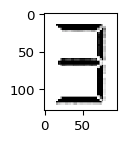

Image list:


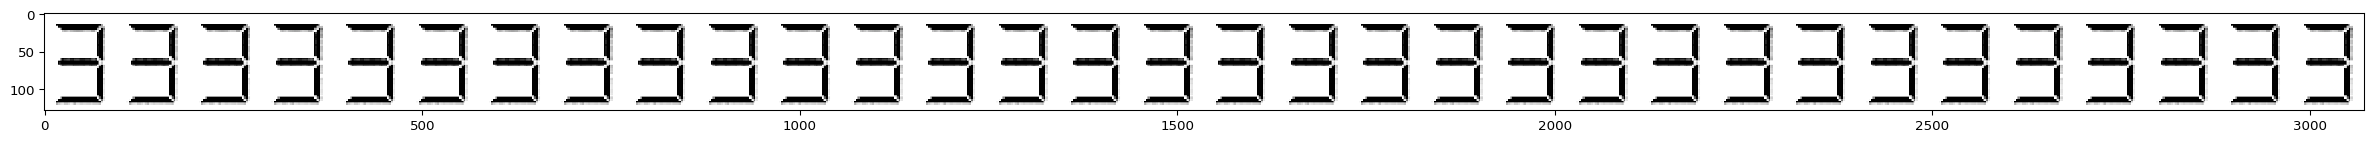

Image batch: 
Number of image in batch:  8


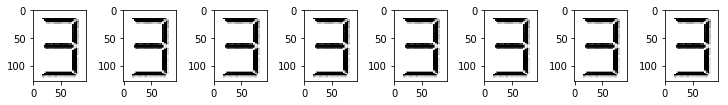

In [727]:
# Load and display 
image = imageio.imread("./digit/3.png")
image = cv.resize(image, (input_width,input_height), interpolation=cv.INTER_CUBIC)
print("Original:", image.shape)
ia.imshow(image)

# a list of images
images = []
for i in range(list_size):
    images.append(image)
print("Image list:")
ia.imshow(np.hstack(images))

# create a batch of images
images_batch = np.array(
    [image for _ in range(batch_size)],
    dtype=np.uint8
)
print("Image batch: ")
print("Number of image in batch: ", len(images_batch))
#ia.imshow(np.hstack(images_batch))
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
for i in range (batch_size):
    ax[i].imshow(images_batch[i])

In [728]:
### Colored 

Red images:
Green images:
Blue images:


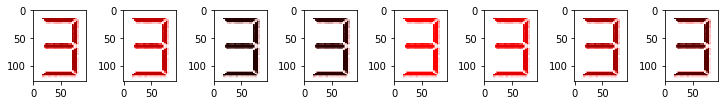

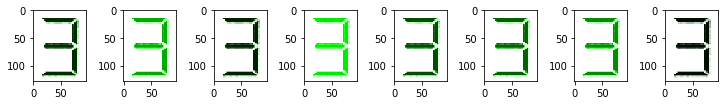

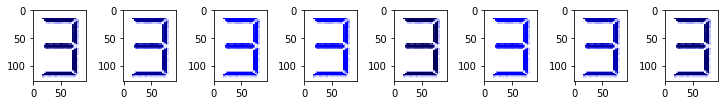

In [729]:
aug_red = iaa.WithChannels(0, iaa.Add(red_range))
aug_green = iaa.WithChannels(1, iaa.Add(green_range))
aug_blue = iaa.WithChannels(2, iaa.Add(blue_range))


red_images = aug_red.augment_images(images_batch)
green_images = aug_green.augment_images(images_batch)
blue_images = aug_blue.augment_images(images_batch)



fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Red images:")
for i in range (batch_size):
    ax[i].imshow(red_images[i])

fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Green images:")
for i in range (batch_size):
    ax[i].imshow(green_images[i])
    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Blue images:")
for i in range (batch_size):
    ax[i].imshow(blue_images[i])

### Resize

Resized images:


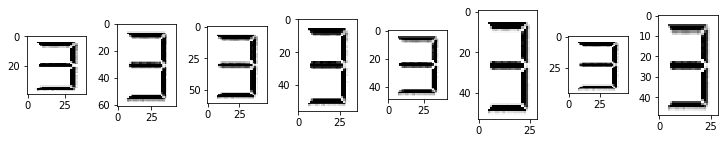

In [730]:
aug_resize = iaa.Resize({"height": resize_height , "width": resize_width })
resized_images = aug_resize.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Resized images:")
for i in range (batch_size):
    ax[i].imshow(resized_images[i])

### Superpixels

Superpixels_images images:


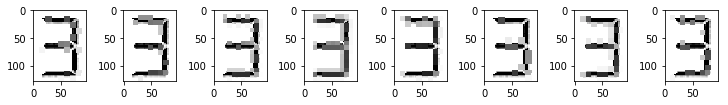

In [731]:
aug_superpixels = iaa.Superpixels(p_replace=superpixel_p, n_segments=superpixel_n)
superpixels_images = aug_superpixels.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Superpixels_images images:")
for i in range (batch_size):
    ax[i].imshow(superpixels_images[i])

### Blur

Gaussianblurred images:
Avgblurred images:
Medianblurred images:


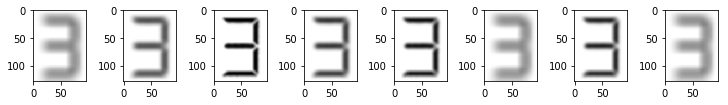

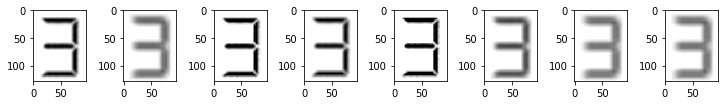

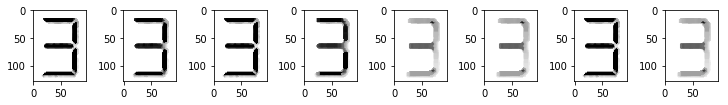

In [732]:
aug_gaussianblur = iaa.GaussianBlur(sigma=gau_blur_size)
aug_avgblur = iaa.AverageBlur(k=avg_blur_size)
aug_medianblur = iaa.MedianBlur(k=med_blur_size)

gaussianblurred_images = aug_gaussianblur.augment_images(images_batch)
avgblurred_images = aug_avgblur.augment_images(images_batch)
medianblurred_images = aug_medianblur.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Gaussianblurred images:")
for i in range (batch_size):
    ax[i].imshow(gaussianblurred_images[i])
    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Avgblurred images:")
for i in range (batch_size):
    ax[i].imshow(avgblurred_images[i])
    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Medianblurred images:")
for i in range (batch_size):
    ax[i].imshow(medianblurred_images[i])

### Sharpen

Sharpen_images images:


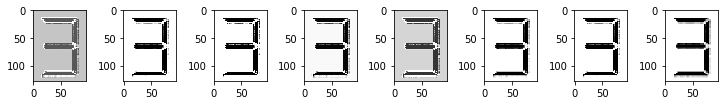

In [733]:
aug_sharpen = iaa.Sharpen(alpha=sharpen_alpha, lightness=sharpen_lightness)
sharpen_images = aug_sharpen.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Sharpen_images images:")
for i in range (batch_size):
    ax[i].imshow(sharpen_images[i])

### Emboss

Emboss_images images:


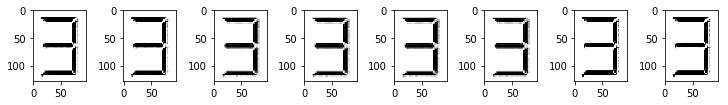

In [734]:
aug_emboss = iaa.Emboss(alpha=emboss_alpha, strength=emboss_strength)
emboss_images = aug_emboss.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Emboss_images images:")
for i in range (batch_size):
    ax[i].imshow(emboss_images[i])

### Add

Add_images images:


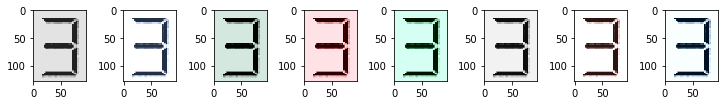

In [735]:
aug_add = iaa.Add(add_size, per_channel= add_per_channel_size)
add_images = aug_add.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Add_images images:")
for i in range (batch_size):
    ax[i].imshow(add_images[i])

### Additive Gaussian Noise 

Add_gau_noise images:


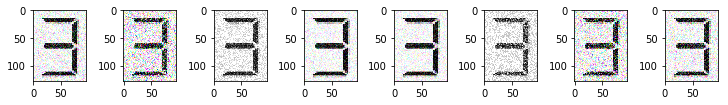

In [736]:
aug_add_gau_noise = iaa.AdditiveGaussianNoise(scale=gaussian_noise, per_channel=0.6)
add_gau_nooise_images = aug_add_gau_noise.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Add_gau_noise images:")
for i in range (batch_size):
    ax[i].imshow(add_gau_nooise_images[i])

### Multiply

Multiply images:


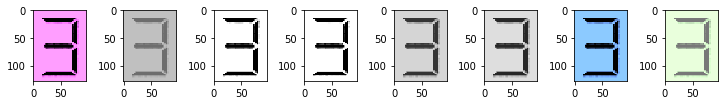

In [737]:
aug_multiply = iaa.Multiply(multiply_scale, per_channel=0.6)
multiply_images = aug_multiply.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Multiply images:")
for i in range (batch_size):
    ax[i].imshow(multiply_images[i])

### Dropout 

Dropout images:


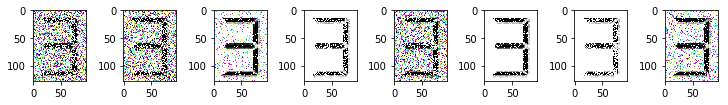

In [738]:
aug_Dropout = iaa.Dropout(p=dropout_p, per_channel=0.6)
Dropout_images = aug_Dropout.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Dropout images:")
for i in range (batch_size):
    ax[i].imshow(Dropout_images[i])

### Coarse Dropout

CoarseDropout images:


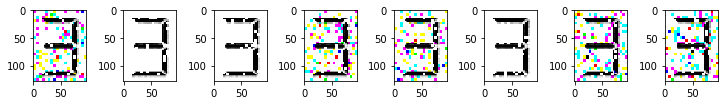

In [739]:
aug_CoarseDropout = iaa.CoarseDropout(0.1, size_percent=coarse_dropout, per_channel=0.6)
CoarseDropout_images = aug_CoarseDropout.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("CoarseDropout images:")
for i in range (batch_size):
    ax[i].imshow(CoarseDropout_images[i])

### Contrast Normalization

ContrastNormalization images:
(8, 128, 96, 4)


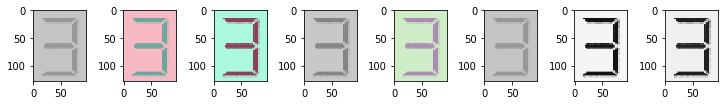

In [740]:
aug_ContrastNormalization = iaa.ContrastNormalization(contrast_normal_scale, per_channel=0.5)
ContrastNormalization_images = aug_ContrastNormalization.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("ContrastNormalization images:")
for i in range (batch_size):
    ax[i].imshow(ContrastNormalization_images[i])
    
print (ContrastNormalization_images.shape)

### Salt and pepper noise 

(8, 128, 96, 4)
Salt and Pepper noised images:


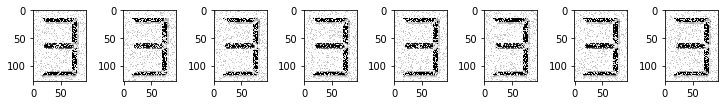

In [741]:
def apply_coarse_salt_and_pepper(image, p, size_px):
    # mask where to replace
    mask = iap.Binomial(p)
    
    # make the mask coarser
    mask_coarse = iap.FromLowerResolution(other_param=mask, size_px=size_px)

    # the noise to use as replacements, mostly close to 0.0 and 1.0
    replacement = iap.Beta(0.5, 0.5)
    
    # project noise to uint8 value range
    replacement = replacement * 255

    # replace masked areas with noise
    return iaa.ReplaceElementwise(
        mask=mask_coarse,
        replacement=replacement
    ).augment_image(image)


aug_saltandpepper_images= np.array(
    [image for _ in range(batch_size)],
    dtype=np.uint8
)

print(aug_saltandpepper_images.shape)
for i in range (batch_size):
    aug_saltandpepper_images[i] = apply_coarse_salt_and_pepper(images_batch[i], spnoise[0], spnoise[1])  # apply noise

    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Salt and Pepper noised images:")
for i in range (batch_size):
    ax[i].imshow(aug_saltandpepper_images[i])

### Affine

Translated images:
Rotated images:
Shearred images:


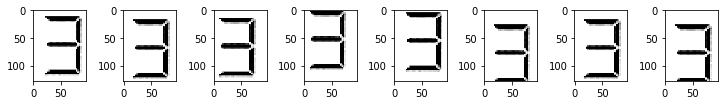

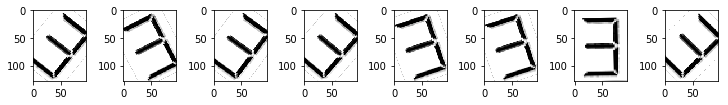

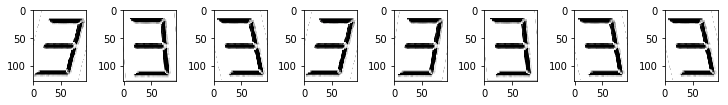

In [742]:
aug_translate = iaa.Affine(translate_percent={"x": affine_translate_x, "y": affine_translate_y})
aug_rotate = iaa.Affine(rotate=affine_rotate)
aug_shear = iaa.Affine(shear=affine_shear)

translated_affine_images = aug_translate.augment_images(images_batch)
rotated_affine_images = aug_rotate.augment_images(images_batch)
shearred_affine_images = aug_shear.augment_images(images_batch)

fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Translated images:")
for i in range (batch_size):
    ax[i].imshow(translated_affine_images[i])
    
    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Rotated images:")
for i in range (batch_size):
    ax[i].imshow(rotated_affine_images[i])
    
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Shearred images:")
for i in range (batch_size):
    ax[i].imshow(shearred_affine_images[i])

### Piece-wise Affine

Piecewise_affine images:


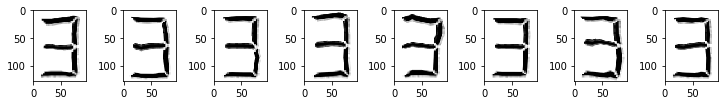

In [743]:
aug_piecewise_affine = iaa.PiecewiseAffine(scale=piecewise_affine_scale)
piecewise_affine_images = aug_piecewise_affine.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Piecewise_affine images:")
for i in range (batch_size):
    ax[i].imshow(piecewise_affine_images[i])
    

### Elastic Transformation 

Elastic images:


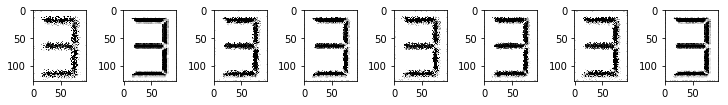

In [744]:
aug_elastic = iaa.ElasticTransformation(alpha=elastic_alpha, sigma=elastic_sigma)
elastic_images = aug_elastic.augment_images(images_batch)
fig, ax = plt.subplots(1,batch_size, constrained_layout=True, figsize=(10,10))
print("Elastic images:")
for i in range (batch_size):
    ax[i].imshow(elastic_images[i])

In [745]:
os.getcwd()

'/Users/missbamboo/Desktop/intel/ocr/ocr-digital-display'

### Sequence of augmentation

In [752]:
os.chdir('/Users/missbamboo/Desktop/intel/ocr/ocr-digital-display')

# Create directory
dirName = 'Augmentated Output'
 
try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory" , dirName ,  "Created ") 
except FileExistsError:
    print("Directory" , dirName ,  "Already Exists")
    
# empty the directory
for the_file in os.listdir(dirName):
    file_path = os.path.join(dirName, the_file)
    try:
        if os.path.isfile(dirName):
            os.unlink(dirName)
        #elif os.path.isdir(file_path): shutil.rmtree(file_path)
    except Exception as e:
        print(e)


Directory Augmentated Output Already Exists


In [753]:
# variables setting
digit = 0

input_height=128
input_width=96
list_size = 32
batch_size = 8

# red_range = (1, random.randint(1,200))
# blue_range = (1, random.randint(1,200))
# green_range = (1, random.randint(1,200))
red_range = (1, 200)
blue_range = (1, 200)
green_range = (1, 200)

resize_height= (0.3,0.5)
resize_width= (0.3,0.5)

superpixel_p = (0.1, 0.25)
superpixel_n = (32, 128)

gau_blur_size = (0.0, 3.0)
avg_blur_size = (2, 3)
med_blur_size = (3, 5)

sharpen_alpha=(0.0, 0.2)
sharpen_lightness=(0.0, 2.0)

emboss_alpha= (0.0, 0.2)
emboss_strength=(0.2, 0.4)

add_size = (-20, 20)
add_per_channel_size = 0.2

gaussian_noise=(0, 0.02*255)

multiply_scale= (0.9, 1.1)

dropout_p=(0, 0.2)

coarse_dropout = 0.02

contrast_normal_scale = (0, 1)

spnoise= (0.3, 300)

affine_translate_x=(-0.05, 0.05)
affine_translate_y=(-0.05, 0.05)
affine_rotate=(-30, 30)
affine_shear = (-2, 2)

piecewise_affine_scale= (0.01, 0.02)

elastic_alpha = (0,0.5)
elastic_sigma = 0.01

sample = 128

Original: (128, 96, 4)


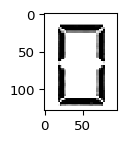

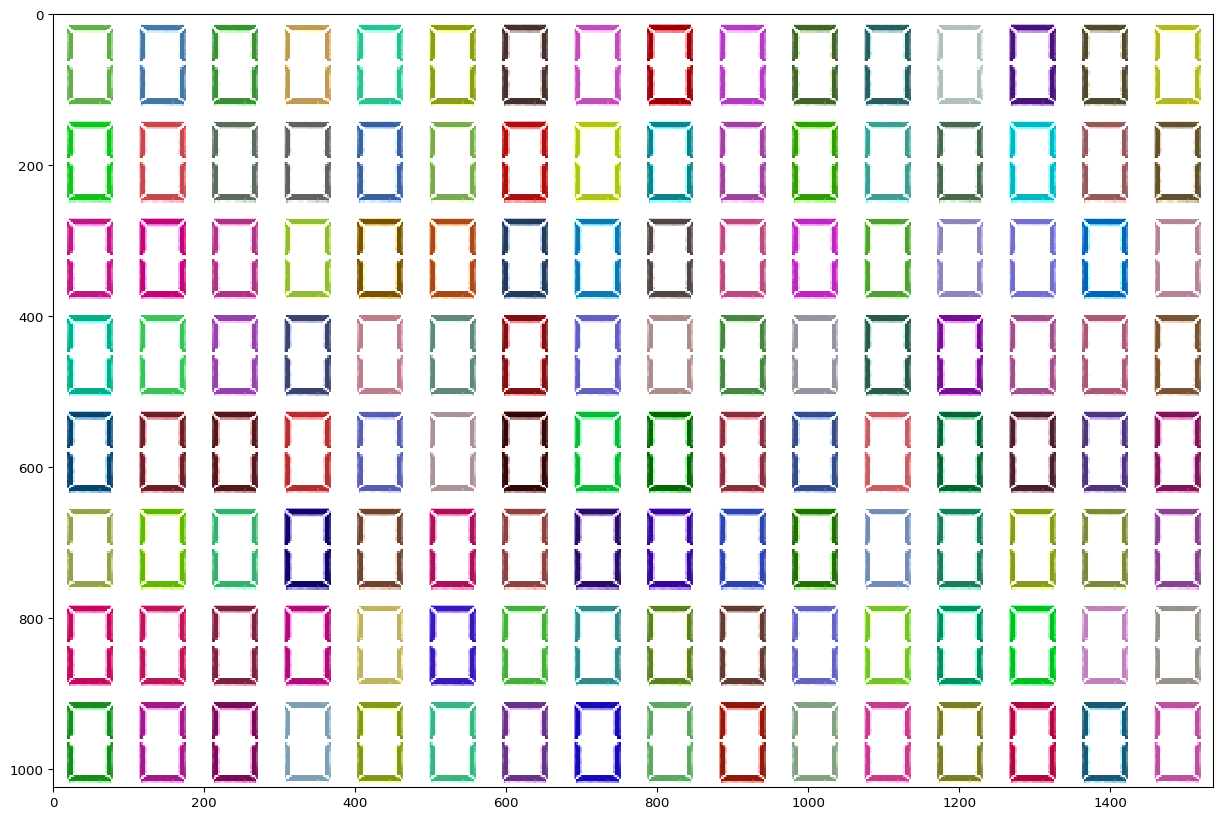

In [754]:
image_name = "./digit/" + str(digit)+".png"
# Load and display 
image = imageio.imread(image_name)
image = cv.resize(image, (input_width,input_height), interpolation=cv.INTER_CUBIC)
print("Original:", image.shape)
ia.imshow(image)

images = np.array(
    [image for _ in range(sample)],
    dtype=np.uint8
)

seq_color= iaa.Sequential([
    iaa.WithChannels(0, iaa.Add(red_range)),
    iaa.WithChannels(1, iaa.Add(green_range)),
    iaa.WithChannels(2, iaa.Add(blue_range))
], random_order=True)

images_color_aug = seq_color(images=images)
ia.imshow(ia.draw_grid(images_color_aug, cols=sample/8, rows=8))

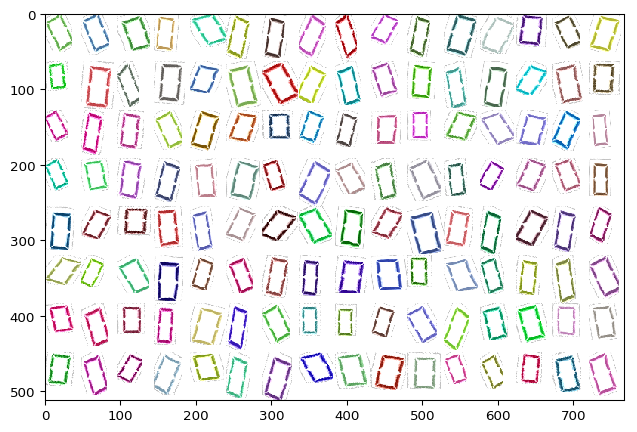

In [755]:
#ia.seed(1)

seq = iaa.Sequential([
    iaa.Resize({"height": resize_height , "width": resize_width }),   
    
    iaa.Affine(translate_percent={"x": affine_translate_x, "y": affine_translate_y}),
    iaa.Affine(rotate=affine_rotate),
    iaa.Affine(shear=affine_shear),
    
    iaa.PiecewiseAffine(scale=piecewise_affine_scale),
    
    iaa.ElasticTransformation(alpha=elastic_alpha, sigma=elastic_sigma)
], random_order=True)

images_trans_aug = seq(images=images_color_aug)
ia.imshow(ia.draw_grid(images_trans_aug, cols=sample/8, rows=8))

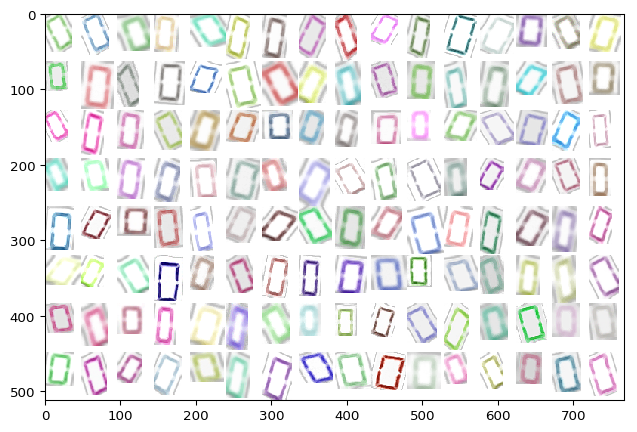

In [756]:
#ia.seed(1)

seq = iaa.Sequential([

#   iaa.Superpixels(p_replace=superpixel_p, n_segments=superpixel_n),
    
    iaa.GaussianBlur(sigma=gau_blur_size),
    iaa.AverageBlur(k=avg_blur_size),
    iaa.MedianBlur(k=med_blur_size),
    
    iaa.Sharpen(alpha=sharpen_alpha, lightness=sharpen_lightness),
    
    iaa.Emboss(alpha=emboss_alpha, strength=emboss_strength),
    
#   iaa.Add(add_size, per_channel= add_per_channel_size),
    
    iaa.AdditiveGaussianNoise(scale=gaussian_noise, per_channel=0.2),
    
#   iaa.Multiply(multiply_scale, per_channel=0.2),
    
#   iaa.Dropout(p=dropout_p, per_channel=0.2),
    
#   iaa.CoarseDropout(0.1, size_percent=coarse_dropout, per_channel=0.2)
    

], random_order=True)

images_aug = seq(images=images_trans_aug)
ia.imshow(ia.draw_grid(images_aug, cols=sample/8, rows=8))

In [757]:
# Create directory
dir_each = str(digit)
os.chdir(dirName)
try:
    # Create target Directory
    os.mkdir(dir_each)
    print("Directory" , dir_each ,  "Created ") 
except FileExistsError:
    print("Directory" , dir_each ,  "Already Exists")
    
# empty the directory
list( map( os.unlink, (os.path.join( dir_each,f) for f in os.listdir(dir_each)) ) )
    
    
# load images to idrectory 
for i in range (sample):
    filename =  str(digit)+ "_"+str(i)+".jpg"
    cv.imwrite(os.path.join(dir_each, filename), images_aug[i])
    
os.chdir('/Users/missbamboo/Desktop/intel/ocr/ocr-digital-display')

Directory 0 Already Exists


### Stochastic (default) and Deterministic (unchanged) Modes

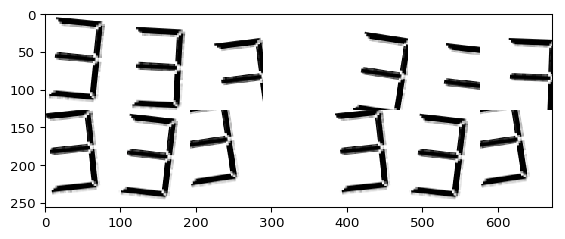

In [230]:
aug = iaa.Affine(translate_px=(-30, 30), rotate=(-10, 10), cval=255)
batches = [[image] * 3, [image] * 3]  # two batches of each three images


# augment in stochastic mode
images_stochastic = [aug.augment_images(batch) for batch in batches]

# augment in deterministic mode
aug_det = aug.to_deterministic()
images_deterministic = [aug_det.augment_images(batch) for batch in batches]

# visualize
whitespace = np.full(image.shape, 255, dtype=np.uint8)
ia.imshow(
    ia.draw_grid(
        images_stochastic[0] + [whitespace] + images_stochastic[1] +  # first row is stochastic mode
        images_deterministic[0] + [whitespace] + images_deterministic[1],  # second row is deterministic mode
        rows=2,
        cols=2*3
    )
)

### A simple and common augmentation sequence

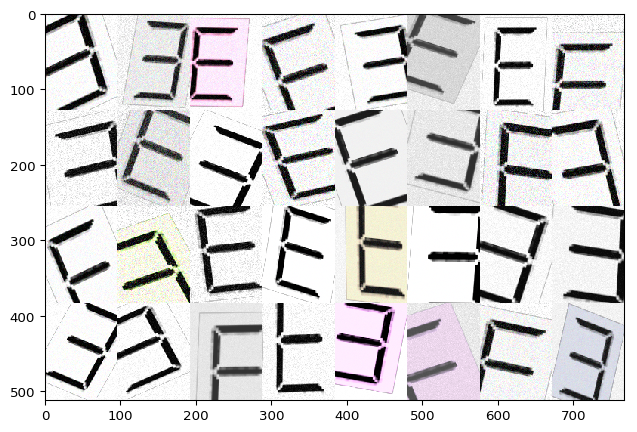

In [399]:
# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [image for _ in range(32)],
    dtype=np.uint8
)

#ia.imshow(ia.draw_grid(images, cols=8, rows=4))

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.1*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=4))

### Blending/Overlaying images

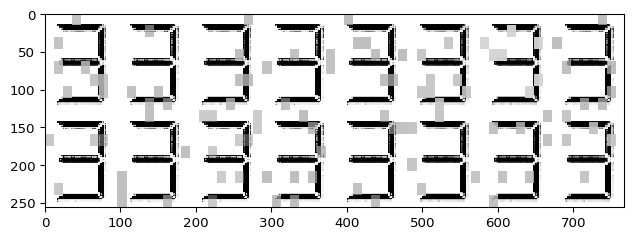

In [13]:
ia.seed(1)

# Example batch of images.
# The array has shape (8, 128, 128, 3) and dtype uint8.
images = np.array(
    [image for _ in range(16)],
    dtype=np.uint8
)
seq = iaa.Alpha(
    factor=(0.2, 0.8),
    first=iaa.Sharpen(1.0, lightness=2),
    second=iaa.CoarseDropout(p=0.1, size_px=8)
)

images_aug = seq.augment_images(images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=2))

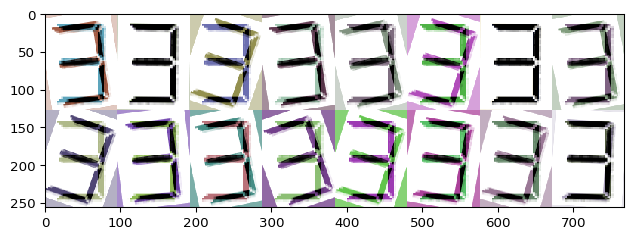

In [14]:
ia.seed(1)

seq = iaa.Alpha(
    factor=(0.2, 0.8),
    first=iaa.Affine(rotate=(-20, 20)),
    per_channel=True
)

images_aug = seq.augment_images(images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=2))

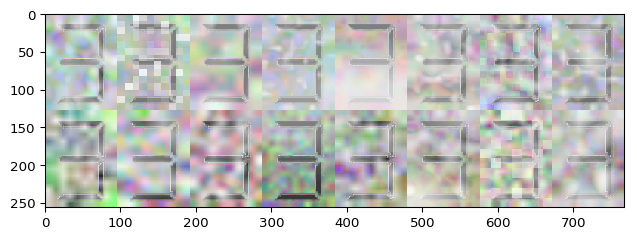

In [16]:
ia.seed(1)
seq = iaa.SimplexNoiseAlpha(
    first=iaa.EdgeDetect(1.0),
    per_channel=True
)

images_aug = seq.augment_images(images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=2))


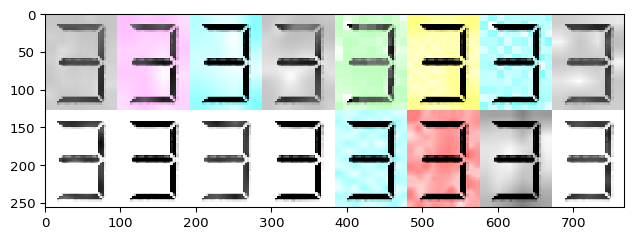

In [17]:
ia.seed(1)
seq = iaa.FrequencyNoiseAlpha(
    first=iaa.Multiply(iap.Choice([0.5, 1.5]), per_channel=True)
)

images_aug = seq.augment_images(images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=2))

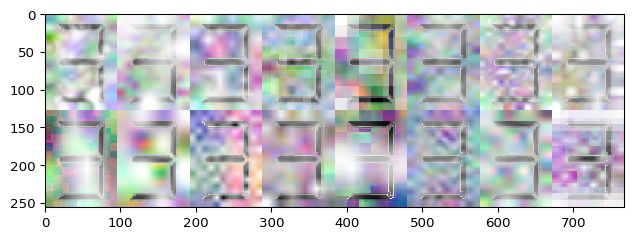

In [18]:
ia.seed(1)
seq = iaa.FrequencyNoiseAlpha(
    first=iaa.EdgeDetect(1.0),
    per_channel=True
)

images_aug = seq.augment_images(images)
ia.imshow(ia.draw_grid(images_aug, cols=8, rows=2))